---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
    graph = nx.read_edgelist("Employee_Movie_Choices.txt",delimiter='\t')
    return graph

<IPython.core.display.Javascript object>


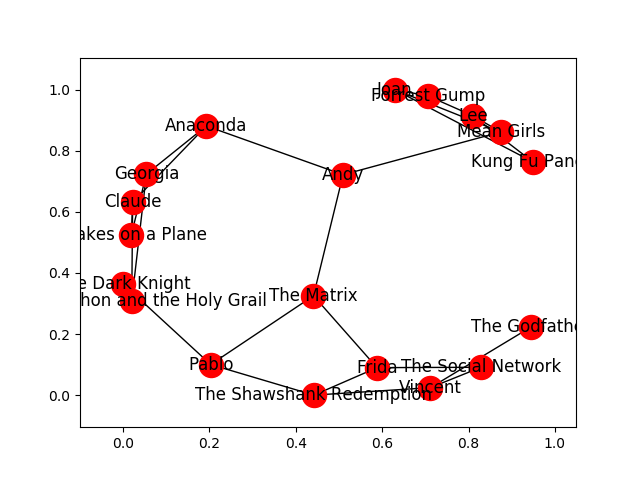

In [13]:
#plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [4]:
G = answer_one()
def answer_two():
    G = answer_one()
    for employe in list(employees):
        G.node[employe]["type"] = 'employee'
    for movie in list(movies):
        G.node[movie]['type'] = 'movie'
    return G

<IPython.core.display.Javascript object>


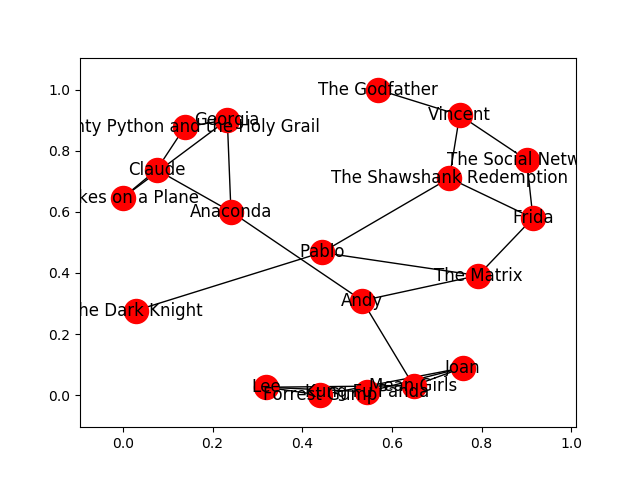

In [15]:
#plot_graph(answer_two())

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [6]:
def answer_three():
    G = answer_two()
    weighted_projected_graph = bipartite.weighted_projected_graph(G, employees)
    return weighted_projected_graph

<IPython.core.display.Javascript object>


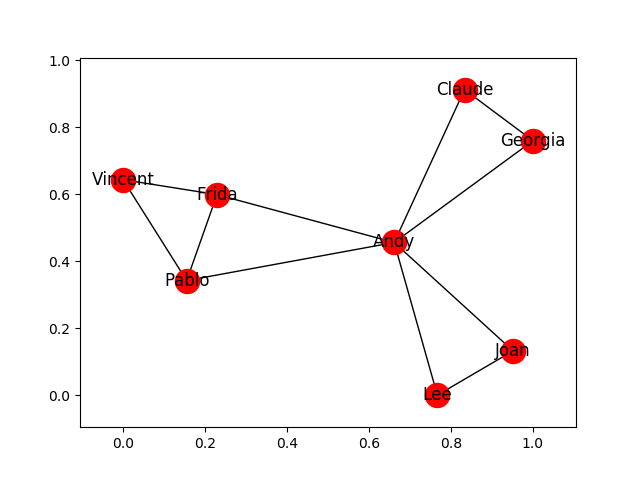

In [16]:
#plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [83]:
def answer_four():
    G = answer_three()
    relation = pd.DataFrame((nx.read_edgelist("Employee_Relationships.txt", data=[("relationship_score", int)])).edges(data=True),
                            columns=["From",'To','Relationship score'])
    common_movies = pd.DataFrame(G.edges(data=True), columns=["From",'To','Weight'])
    common_movies_transpose = common_movies.copy()
    common_movies_transpose.rename(columns={"From":"To", "To":"From"}, inplace=True)
    common_movies_join = pd.concat([common_movies, common_movies_transpose])

    df = pd.merge(common_movies_join,relation,how='right',on=['From','To'])
    df["Relationship score"] = df["Relationship score"].map(lambda x:x["relationship_score"])
    df['Weight'] = df['Weight'].map(lambda x:x["weight"] if type(x)==dict else 0)
    corr = df["Weight"].corr(df["Relationship score"])
    return corr

In [84]:
#answer_four()

0.78839622217334726